**Board game analysis**

As a big fan of board games, and a junior data analyst, I decided to combine my two passions and to analyze a board games dataset. The dataset was downloaded from https://www.kaggle.com/datasets/mshepherd/board-games?select=bga_GameItem.csv. Briefly, these data are scraped from  BoardGameGeek website, contains ~113000 rows (board games). Let's explore!

Let's imagine we have an investor who wants to determine whether it's a good idea to invest in the development and release of a new board game. To help make this decision, I suggest investigating several key aspects:

1. **What are the general market trends and opportunities?**
2. **Consumer Preferences:** What types of board games are currently popular (with higher ratings)? Are cooperative or competitive games more favored? What are the preferred game mechanics, number of players, and game durations?
3. **Consumer Demographics:** Which age group is the most active in playing board games?
4. **Popular Board Game Types:** Are standalone board games more popular, or do games inspired by famous movies or TV series attract more attention?

**Data preparation and cleaning**

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [111]:
df=pd.read_csv('bgg_GameItem.csv', index_col='bgg_id')
df.head(5)

,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
bgg_id,,,,,,,,,,,,,,,,,,,,,
1,Die Macher,1986.0,5497,1,"12517,4959","133,2,24883,2726,15108,39249,11652,5382,8147",3.0,5.0,4.0,5.0,...,1.57510,7.06367,4.3144,1.166667,NaN,NaN,NaN,NaN,NaN,NaN
2,Dragonmaster,1981.0,5497,8384,12424,"64,20",3.0,4.0,3.0,4.0,...,1.46752,5.76599,1.9636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Samurai,1998.0,5497,2,11883,"17,133,267,29,7340,7335,41,2973,4617,1391,8291...",2.0,4.0,2.0,4.0,...,1.19279,7.22869,2.4784,1.006579,NaN,NaN,NaN,NaN,NaN,NaN
4,Tal der Könige,1992.0,5497,8008,2277,37,2.0,4.0,2.0,4.0,...,1.23667,5.66660,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Acquire,1964.0,5497,4,"12658,18317","92,5,4871,3082,858,2962,28072,5392,4668,38,462...",2.0,6.0,3.0,6.0,...,1.33603,7.12541,2.4985,1.095890,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df.shape

(113904, 37)

In [115]:
df.describe()

,year,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
count,104219.000000,111966.000000,108448.000000,111966.000000,108448.000000,111966.000000,108448.000000,90641.000000,1126.000000,91342.000000,...,68497.000000,24934.000000,48290.000000,854.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,2001.765551,2.020703,6.908306,2.025892,6.887328,2.061403,6.861168,9.517437,9.863855,50.787622,...,1.511145,5.677975,1.902059,2.113773,NaN,NaN,NaN,NaN,NaN,NaN
std,66.493704,0.817943,49.819444,0.823590,49.807438,0.862756,49.809422,7.471185,2.824199,604.980910,...,0.625139,0.357619,0.830024,1.191279,NaN,NaN,NaN,NaN,NaN,NaN
min,-3500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.045455,1.000000,...,0.000500,3.624890,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1998.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,8.000000,7.987899,15.000000,...,1.176210,5.509562,1.000000,1.013607,NaN,NaN,NaN,NaN,NaN,NaN
50%,2011.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,10.000000,10.000000,30.000000,...,1.465140,5.541855,2.000000,1.778424,NaN,NaN,NaN,NaN,NaN,NaN
75%,2018.000000,2.000000,6.000000,2.000000,6.000000,2.000000,6.000000,12.000000,11.973319,60.000000,...,1.776240,5.662987,2.414025,3.063077,NaN,NaN,NaN,NaN,NaN,NaN
max,2026.000000,50.000000,11299.000000,50.000000,11299.000000,50.000000,11299.000000,2017.000000,20.541667,157680.000000,...,4.500000,8.423300,5.000000,4.983333,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df.isna().sum()

name                        0
year                     9685
game_type               88074
designer                18251
artist                  66032
publisher                  52
min_players              1938
max_players              5456
min_players_rec          1938
max_players_rec          5456
min_players_best         1938
max_players_best         5456
min_age                 23263
min_age_rec            112778
min_time                22562
max_time                22562
category                 2214
mechanic                16767
cooperative            107550
compilation            112989
compilation_of         112989
family                  34859
implementation         108039
integration            109784
rank                    89425
num_votes               27722
avg_rating              27722
stddev_rating           45407
bayes_rating            88970
complexity              65614
language_dependency    113050
bga_id                 113904
dbpedia_id             113904
luding_id 

In [119]:
# Remove all empty columns
df = df.dropna(axis=1, how='all')
df.shape

(113904, 31)

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113904 entries, 1 to 392146
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 113904 non-null  object 
 1   year                 104219 non-null  float64
 2   game_type            25830 non-null   object 
 3   designer             95653 non-null   object 
 4   artist               47872 non-null   object 
 5   publisher            113852 non-null  object 
 6   min_players          111966 non-null  float64
 7   max_players          108448 non-null  float64
 8   min_players_rec      111966 non-null  float64
 9   max_players_rec      108448 non-null  float64
 10  min_players_best     111966 non-null  float64
 11  max_players_best     108448 non-null  float64
 12  min_age              90641 non-null   float64
 13  min_age_rec          1126 non-null    float64
 14  min_time             91342 non-null   float64
 15  max_time             9

As data cleaning step, I remove all entries with unknown year of release and average rating.

In [483]:
df_filtered = df[~df['year'].isna()]
df_filtered = df_filtered[~df_filtered['avg_rating'].isna()]
df_filtered.shape[0]

81106

In [493]:
df_filtered['year'] = df_filtered.loc[:, 'year'].astype(int)

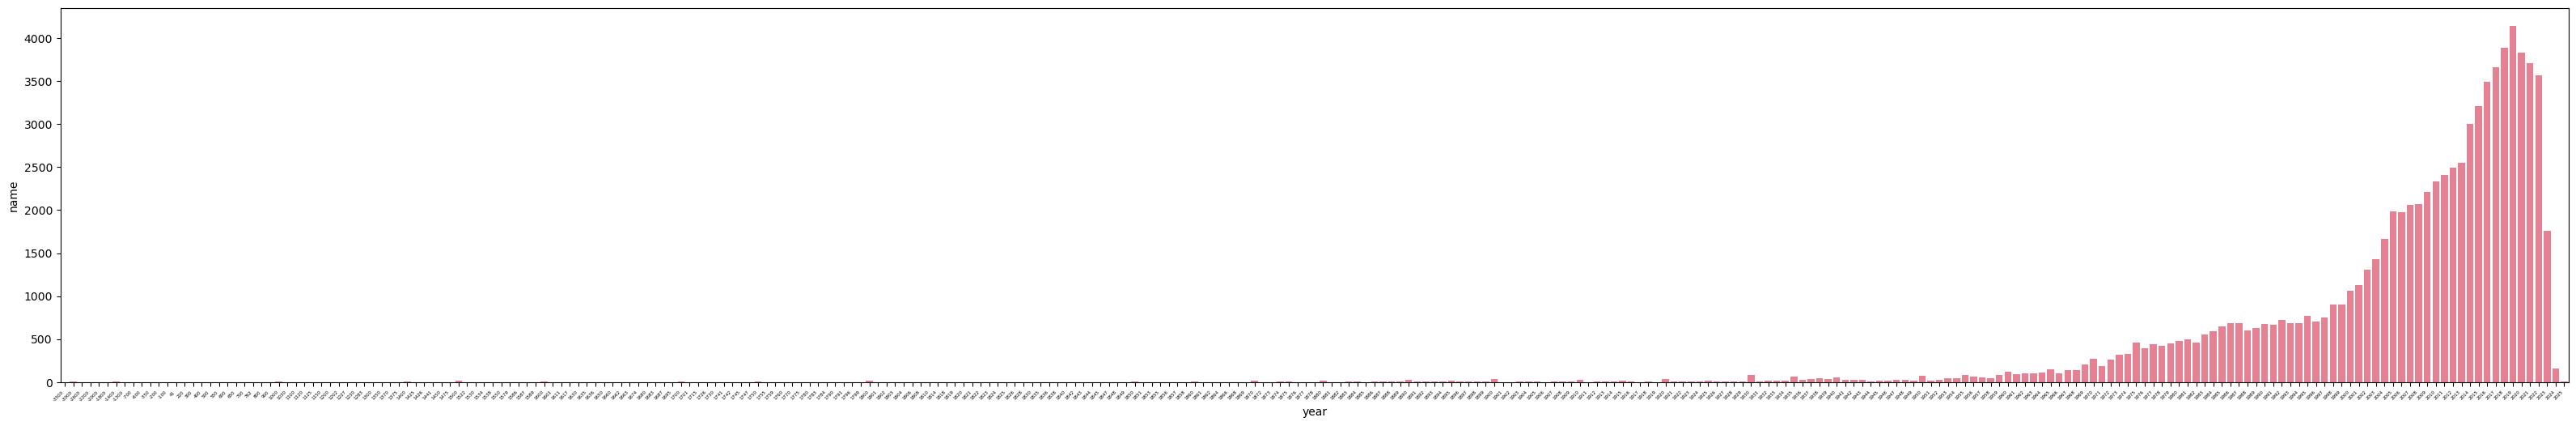

In [495]:
count_year = df_filtered.groupby('year')['name'].count().to_frame()
plt.figure(figsize=(40, 6))
sns.barplot(data=count_year, x ='year', y = 'name')
plt.xticks(rotation=45, ha ='right', size = 4)
plt.show() 

In [129]:
df_filtered.describe()

,year,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,cooperative,compilation,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency
count,104219.000000,102718.000000,99699.000000,102718.000000,99699.000000,102718.000000,99699.000000,84317.000000,1124.000000,85618.000000,8.561800e+04,6055.0,881.0,24269.000000,81106.000000,81106.000000,65471.000000,24720.000000,46540.000000,853.000000
mean,2001.765551,2.016638,6.880250,2.022255,6.858314,2.060934,6.829918,9.573609,9.870931,50.870004,1.384615e+03,1.0,1.0,12191.000494,280.579661,6.178445,1.514818,5.679409,1.906881,2.111757
std,66.493704,0.807291,51.684912,0.813481,51.673133,0.856575,51.675196,7.675874,2.820472,622.631465,2.448270e+05,0.0,0.0,7059.605138,2215.131768,1.570296,0.615629,0.358510,0.827212,1.190520
min,-3500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.045455,1.000000,1.000000e+00,1.0,1.0,1.000000,1.000000,1.000000,0.000500,3.624890,1.000000,1.000000
25%,1998.000000,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,8.000000,7.997768,15.000000,2.000000e+01,1.0,1.0,6076.000000,2.000000,5.280000,1.190235,5.509898,1.000000,1.013514
50%,2011.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,10.000000,10.000000,30.000000,4.000000e+01,1.0,1.0,12165.000000,8.000000,6.225000,1.468120,5.542390,2.000000,1.777778
75%,2018.000000,2.000000,6.000000,2.000000,6.000000,2.000000,6.000000,12.000000,11.973853,60.000000,6.000000e+01,1.0,1.0,18311.000000,46.000000,7.083330,1.774515,5.665225,2.428600,3.060000
max,2026.000000,50.000000,11299.000000,50.000000,11299.000000,50.000000,11299.000000,2017.000000,20.541667,157680.000000,6.307200e+07,1.0,1.0,24481.000000,119186.000000,10.000000,4.500000,8.423300,5.000000,4.983333


I observed that some of the board games have been released before year 1900 which is quite interesting. To discover whether these are typing/scraping errors or valid entries in a dataset, lets count how many board games have been released before 1950, and let's have a look at some of them.

In [131]:
before1900 = df_filtered[df_filtered['year'] < 1900]
before1900.shape[0]

1015

In [133]:
before1900.sample(10)

,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,...,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency
bgg_id,,,,,,,,,,,,,,,,,,,,,
12856,Shove Ha'penny,1840,NaN,3,NaN,"171,1017,5722,3277",2.0,2.0,2.0,2.0,...,61979,NaN,NaN,17936.0,50.0,6.08400,1.76515,5.51098,1.25,NaN
154547,Pleiades,1879,NaN,73375,NaN,"171,2551",2.0,NaN,2.0,NaN,...,24450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11693,The Amusing Game of Innocence Abroad,1888,NaN,"991,3988",NaN,28,2.0,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,4.0,4.75000,1.08972,NaN,1.00,NaN
27791,The Game of Society,1874,NaN,3,NaN,6502,2.0,6.0,2.0,6.0,...,NaN,NaN,NaN,NaN,1.0,7.00000,NaN,NaN,NaN,NaN
227530,The Good Old Game of Proverbs,1893,NaN,3,3,28,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188040,Fly Away Jack & Jill,1894,NaN,3,3,2551,2.0,6.0,2.0,6.0,...,66189,NaN,NaN,NaN,1.0,6.00000,NaN,NaN,NaN,NaN
249407,Mother Earth's Produce Game,1897,NaN,108049,NaN,8999,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308021,Game of Cities,1889,NaN,NaN,NaN,7666,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34317,Shatranj Diwana Shah,1800,4666,3,NaN,"171,38726",2.0,2.0,2.0,2.0,...,"4053,61979,4024",NaN,NaN,NaN,7.0,3.21429,1.46036,NaN,NaN,NaN


In [135]:
before1900[before1900.year<500].shape[0]

27

In [137]:
#the oldest board games
before1900[before1900.year<500]

,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,...,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency
bgg_id,,,,,,,,,,,,,,,,,,,,,
188,Go,-2200,4666,3,"33954,70252","171,92,404,362,5,4922,4680,35302,6765,3828,130...",2.0,2.0,2.0,2.0,...,"26432,78562,78571,78641,78574,73591,68769,7036...",NaN,NaN,194.0,16604.0,7.64323,1.90884,7.31279,3.9338,1.010753
1602,The Royal Game of Ur,-2600,4666,3,"109537,132798","171,22447,3251,3025,3115,24921,5085,6262,50685...",2.0,2.0,2.0,2.0,...,"57934,70948,61979,18186,4023",39628,NaN,7056.0,716.0,6.11016,1.77279,5.62353,1.2857,NaN
2136,Pachisi,400,"4665,5499",3,"59100,9620,52372,54043,30281,6710,53833,141083...","171,9607,10814,7533,404,18931,16840,662,74,524...",2.0,6.0,2.0,4.0,...,"4214,7334,7349,18409,5597,28738,10407,63150,10...",NaN,NaN,24224.0,5237.0,4.50697,1.88432,4.69962,1.1931,1.020833
2399,Senet,-3500,4666,3,"64922,128192,7628,79195","171,4,1017,553,7639,586,200,5085,384,24576,506...",2.0,2.0,2.0,2.0,...,"72535,27383,6471,70360,70711,61938,61979,4023",NaN,173264,9628.0,788.0,5.82329,1.66428,5.56898,NaN,NaN
2912,Hounds and Jackals: Game of the Pharaohs,-2000,NaN,3,7628,"171,3115,50685,15351,7938,5915,642",2.0,2.0,2.0,2.0,...,"72535,7349,61979",NaN,NaN,NaN,21.0,4.86667,2.18944,NaN,1.0000,NaN
2932,Hnefatafl,400,4666,3,"132798,147223,10384,60765","171,1017,404,1997,74,35302,4109,27434,3115,511...",2.0,2.0,2.0,2.0,...,"26432,78565,78571,25158,68769,73590,80224,7843...",NaN,NaN,2940.0,1514.0,6.62856,1.46582,5.96272,2.5000,NaN
3886,Nine Men's Morris,-1400,4666,3,"109537,130246,60765","171,4,1017,6514,1448,22447,73,10992,31495,1935...",2.0,2.0,2.0,2.0,...,"26432,78573,68769,70360,80224,80226,70354,6197...",NaN,NaN,24142.0,1563.0,5.34553,1.61864,5.40718,1.8231,NaN
4148,Mehen,-3000,4666,3,7628,"171,8756,3115,5085,50685,6266,5915,2432,45967",2.0,6.0,2.0,6.0,...,72535,NaN,NaN,NaN,17.0,5.55882,1.98437,NaN,1.0000,NaN
5432,Chutes and Ladders,-200,4665,3,"52810,71033,8810,63030,10171,6710,141083,9988,...","171,20,1001,2008,1017,10814,30,690,4680,7548,2...",2.0,6.0,2.0,6.0,...,"46165,7265,7334,7269,7509,10129,20335,11209,18...",NaN,NaN,24222.0,4412.0,2.89101,1.66474,3.64057,1.0305,1.000000


Indeed, looks like the game release years were correctly scraped from the website ( I manually verified on boardgamegeek the following games Parchisi, Crokinole, Conflict, Aadu Puli Attam). These are very old board games. 

In [139]:
after1900 = df_filtered[df_filtered['year'] >= 1900]
after1900.describe()

,year,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,cooperative,compilation,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency
count,103204.000000,101865.000000,98999.000000,101865.000000,98999.000000,101865.000000,98999.000000,84008.000000,1103.000000,85184.000000,8.518400e+04,6055.0,881.0,24147.000000,80638.000000,80638.000000,65140.000000,24598.000000,46288.000000,835.000000
mean,2004.590636,2.015619,6.877595,2.021195,6.856706,2.059972,6.828281,9.579028,9.932607,50.886927,1.391415e+03,1.0,1.0,12180.779434,279.438850,6.181604,1.513923,5.679941,1.906851,2.134765
std,18.970729,0.807908,51.849572,0.814040,51.838568,0.857199,51.840632,7.687685,2.791716,624.113179,2.454499e+05,0.0,0.0,7050.184491,2214.190308,1.568539,0.614862,0.357383,0.826724,1.192712
min,1900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.045455,1.000000,1.000000e+00,1.0,1.0,1.000000,1.000000,1.000000,0.000500,3.824630,1.000000,1.000000
25%,1998.000000,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,8.000000,8.024002,15.000000,2.000000e+01,1.0,1.0,6074.000000,2.000000,5.285710,1.189475,5.509970,1.000000,1.015625
50%,2011.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,10.000000,10.027778,30.000000,4.000000e+01,1.0,1.0,12160.000000,8.000000,6.227290,1.467140,5.542465,2.000000,1.878788
75%,2018.000000,2.000000,6.000000,2.000000,6.000000,2.000000,6.000000,12.000000,11.993902,60.000000,6.000000e+01,1.0,1.0,18294.000000,46.000000,7.084370,1.773315,5.665415,2.428600,3.072193
max,2026.000000,50.000000,11299.000000,50.000000,11299.000000,50.000000,11299.000000,2017.000000,20.541667,157680.000000,6.307200e+07,1.0,1.0,24481.000000,119186.000000,10.000000,4.500000,8.423300,5.000000,4.983333


In [143]:
after1900[after1900['year']>2024].shape[1]

31

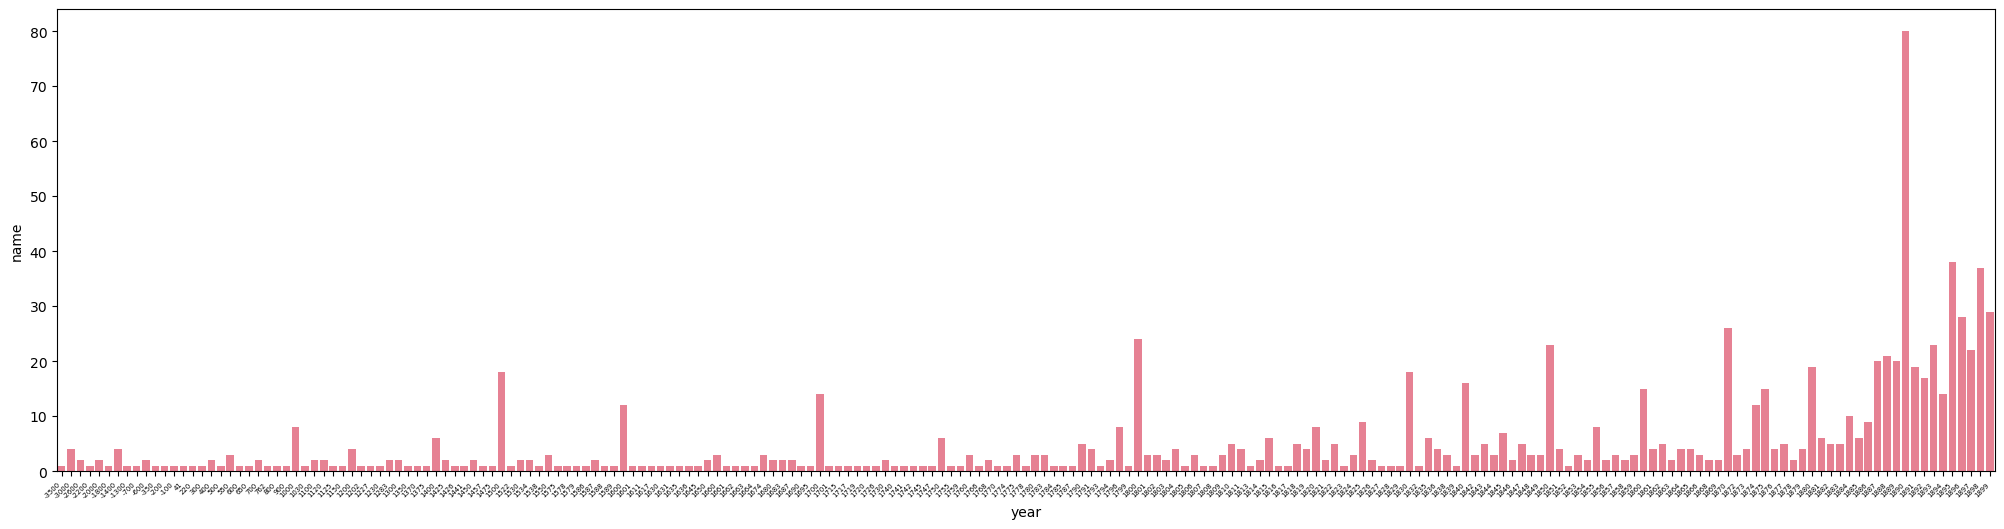

In [145]:
count_year = before1900.groupby('year')['name'].count().to_frame()
plt.figure(figsize=(25, 6))
sns.barplot(data=count_year, x ='year', y = 'name')
plt.xticks(rotation=45, ha ='right', size = 5)
plt.show() 

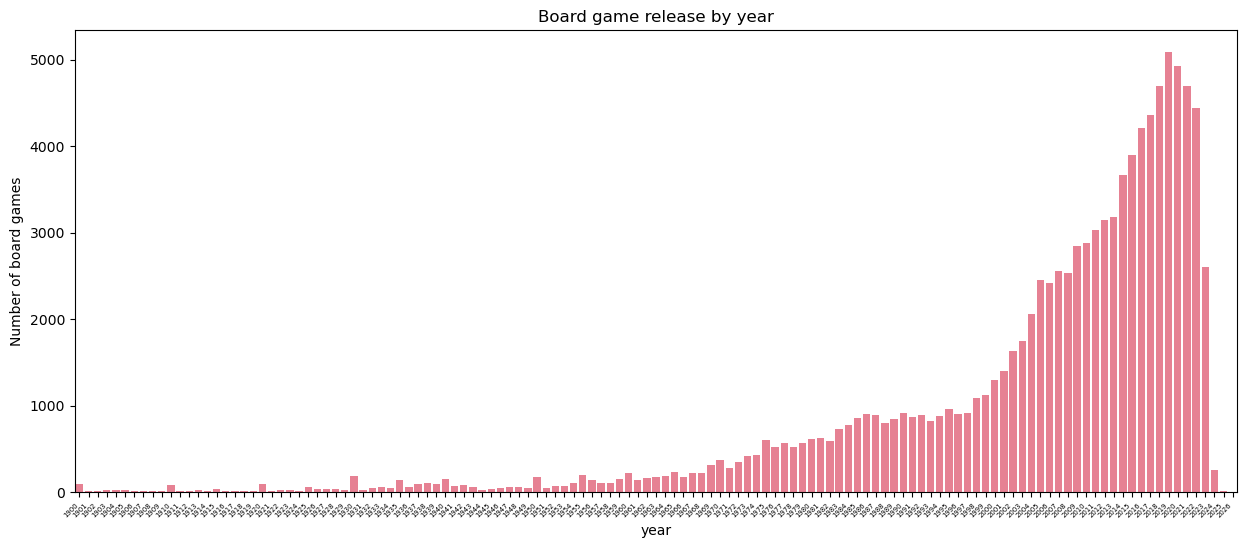

In [147]:
count_year = after1900.groupby('year')['name'].count().to_frame()
sns.set_palette('husl')
plt.figure(figsize=(15, 6))
sns.barplot(data=count_year, x = 'year', y = 'name')
plt.xticks(rotation=45, ha ='right', size = 5)
plt.ylabel('Number of board games')
plt.title('Board game release by year')
plt.show()

As shown on the barplot above, there is a noticeble increase in board games releases starting from around 2000. For further analysis I decided to retain only games released after 2000 and with rating which is based on at least 20 votes.

In [165]:
#to filter only rows where avg rating is present and number of votes is > 20, after year 2000
df2000 = df_filtered[(~df_filtered['avg_rating'].isna()) & (df_filtered['num_votes']>20) & (df_filtered['year']>=2000)]
df2000.shape

(22903, 31)

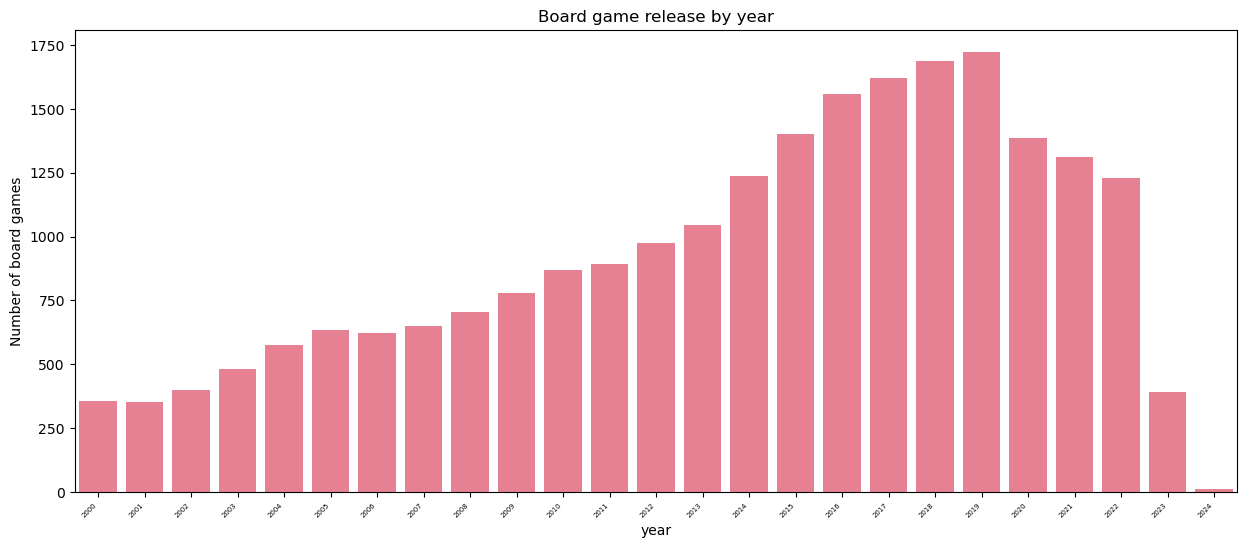

In [167]:
count_year = df2000.groupby('year')['name'].count().to_frame()
sns.set_palette('husl')
plt.figure(figsize=(15, 6))
sns.barplot(data=count_year, x = 'year', y = 'name')
plt.xticks(rotation=45, ha ='right', size = 5)
plt.ylabel('Number of board games')
plt.title('Board game release by year')
plt.show()

It is noticeable that the number of released games in years 2020-24 has decreased; however, this might only reflect the fact that not all released games have received enough ratings to be included in the dataset.

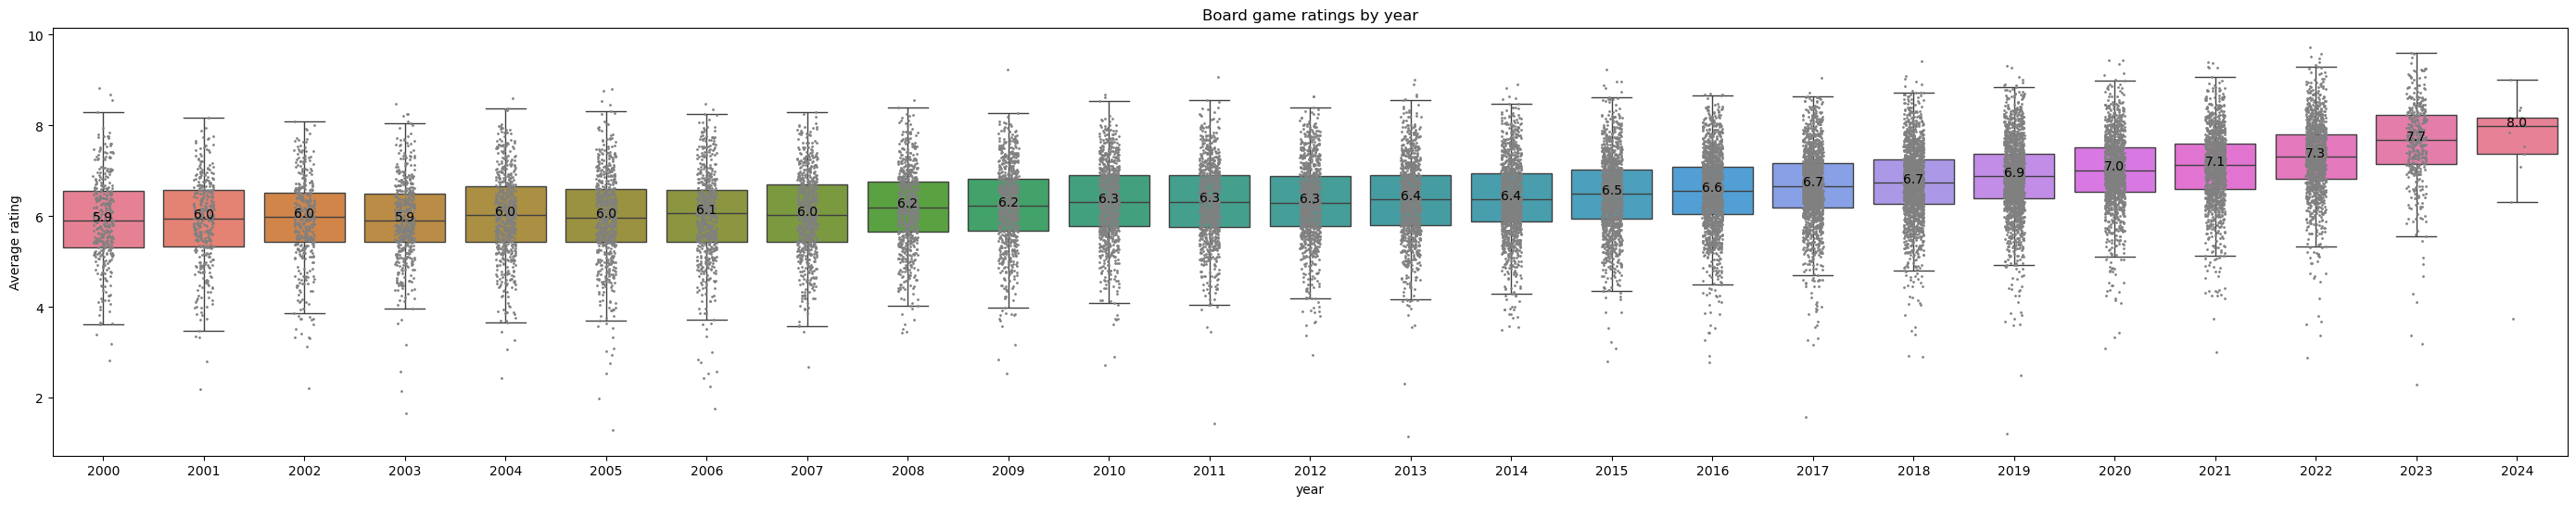

In [169]:
plt.figure(figsize=(35, 6))
sns.boxplot(data=df2000, y = 'avg_rating', x='year', hue = 'year', palette = 'husl', legend = False, showfliers = False)
sns.stripplot(data=df2000, y = 'avg_rating', x='year', size = 2, color = 'grey')
plt.ylabel('Average rating')
plt.title('Board game ratings by year')

medians = df2000.groupby(['year'])['avg_rating'].median().values
for xtick in plt.gca().get_xticks():
    plt.text(xtick, medians[xtick], f'{medians[xtick]:.1f}', 
             horizontalalignment='center', size='medium', color='black')
plt.show()

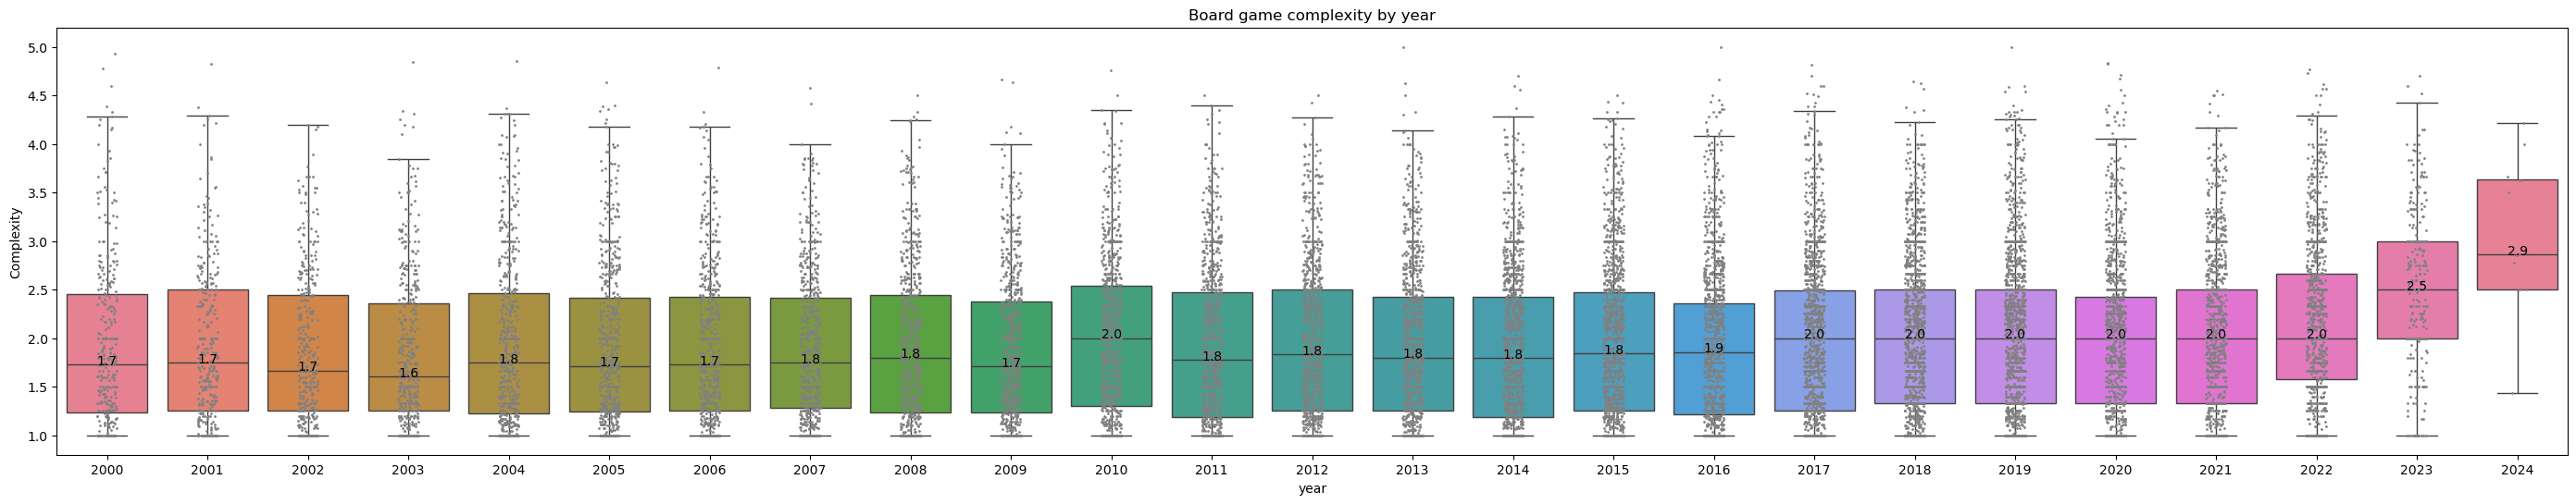

In [222]:
plt.figure(figsize=(35, 6))
sns.boxplot(data=df2000, y = 'complexity', x='year', hue = 'year', palette = 'husl', legend = False, showfliers = False)
sns.stripplot(data=df2000, y = 'complexity', x='year', size = 2, color = 'grey')
plt.ylabel('Complexity')
plt.title('Board game complexity by year')

medians = df2000.groupby(['year'])['complexity'].median().values
for xtick in plt.gca().get_xticks():
    plt.text(xtick, medians[xtick], f'{medians[xtick]:.1f}', 
             horizontalalignment='center', size='medium', color='black')
plt.show()

The average rating of board games has increased in the last two decades, from 5.7 in 2000 to 7.3 in 2022. The average complexity has also slightly increased, from 1.7 in 2000 to 2.0 in 2022.

**Analysis of the most popular board games**

To find the most popular board games, I decided to select only games with number of voters more than 5000 and sort these games based on the average rating. 

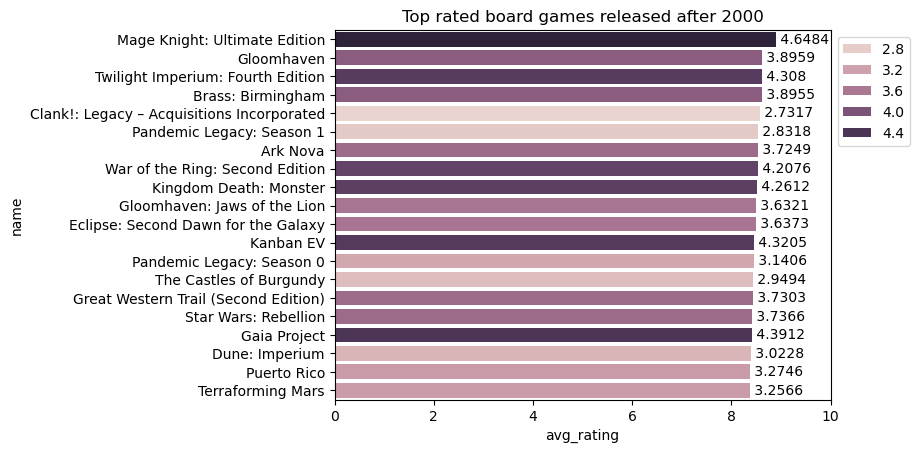

In [442]:
# select games with num votes > 5000 sort by average rating
df2000top = df2000[df2000['num_votes']>5000]
top20 = df2000top.sort_values(by='avg_rating', ascending=False).iloc[:20]
barplot = sns.barplot(data=top20, 
                      y = 'name', 
                      x = 'avg_rating', 
                      hue = 'complexity')
plt.title('Top rated board games released after 2000')
# Adding complexity as labels
for index, value in enumerate(top20['avg_rating']):
    barplot.text(value, index, f" {top20.iloc[index]['complexity']}", color='black', va="center")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(right=10)
plt.show()

**The most higly rated board games**

Let's explore the correlation between complexity and rating for the most popular board games. Interestingly, the data reveals a fascinating trend: as the complexity of a game increases, so does its average rating. This suggests that board game enthusiasts truly enjoy the challenge of more complex games! I can certainly confirm this from my own experience!

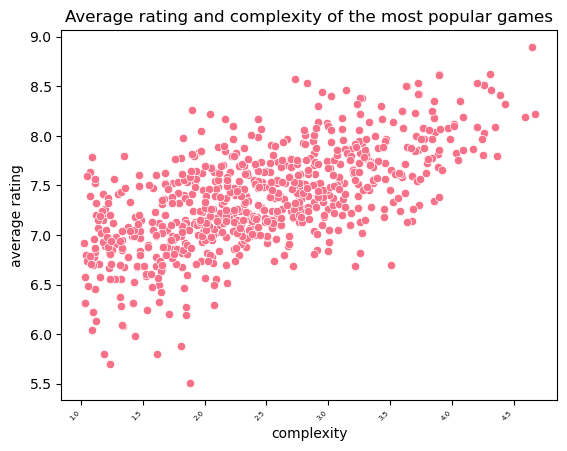

In [396]:
sns.scatterplot(data=df2000top, y = 'avg_rating', x = 'complexity')
plt.xticks(rotation=45, ha ='right', size = 5)
plt.ylabel('average rating')
plt.title('Average rating and complexity of the most popular games')
plt.show()

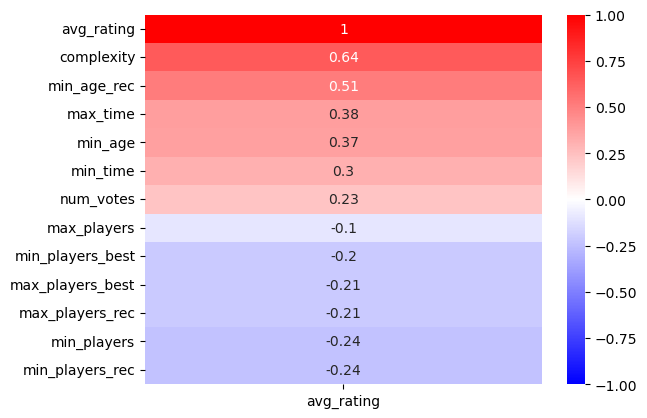

In [398]:
matrix = df2000top[['avg_rating', 'num_votes', 'complexity', 'min_players',	'max_players', 'min_players_rec', 'max_players_rec', 'min_players_best', 'max_players_best', 'min_age', 'min_age_rec', 'min_time', 'max_time']].corr()[['avg_rating']].sort_values(by='avg_rating', ascending=False) 
sns.heatmap(matrix, vmin=-1, vmax=1, annot=True, cmap='bwr')
plt.show()

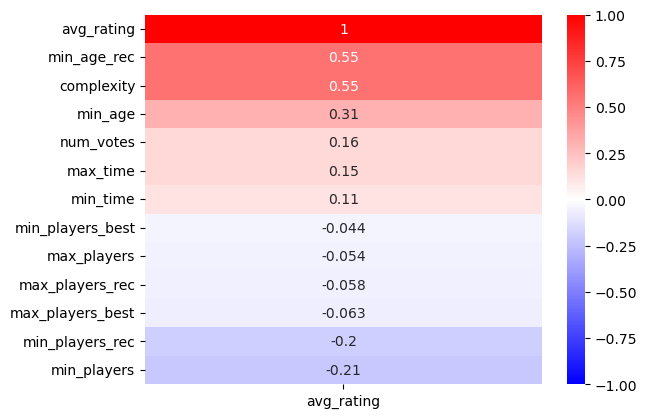

In [400]:
matrix = df2000[['avg_rating', 'num_votes', 'complexity', 'min_players', 'max_players', 'min_players_rec', 'max_players_rec', 'min_players_best', 'max_players_best', 'min_age', 'min_age_rec', 'min_time', 'max_time']].corr()[['avg_rating']].sort_values(by='avg_rating', ascending=False) 
sns.heatmap(matrix, vmin=-1, vmax=1, annot=True, cmap='bwr')
plt.show()

**Best board games for pre-schoolers** 

Next, let's find out the best board games for pre-schoolers based on average rating of the game. 
For this analysis I decided to use minimum age recomended by players as I think user experience provide more robust information of age appropriateness.
In addition, I show the complexity of the board games as label on the bars.

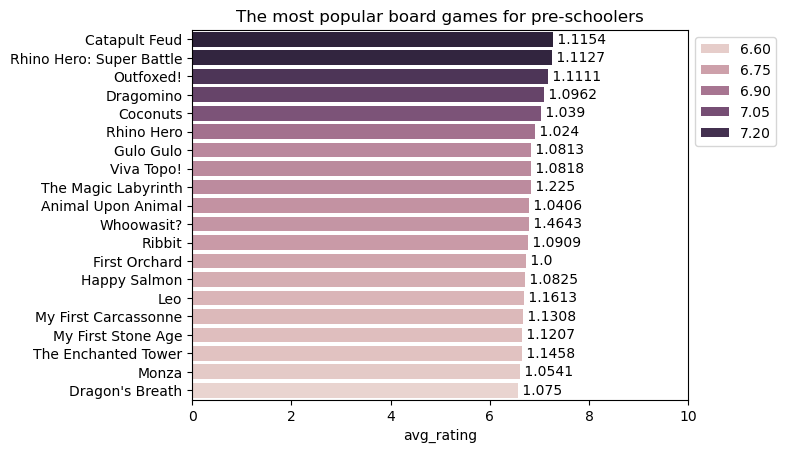

In [436]:
#in this case I will apply less strict filter on number of voters, as children games are not so popular.
preschool = df2000[(df2000['num_votes']>1000) & (df2000['min_age_rec']<5)] 
top20Preschool = preschool.sort_values(by='avg_rating', ascending=False).iloc[:20]
barplot = sns.barplot(data=top20Preschool,
                      y = 'name', 
                      x = 'avg_rating',
                     hue= 'avg_rating')
plt.title('The most popular board games for pre-schoolers')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(right=10)
plt.ylabel(None)
# Adding year of release as labels
for index, value in enumerate(top20Preschool['avg_rating']):
    barplot.text(value, index, f" {top20Preschool.iloc[index]['complexity']}", color='black', va="center")

plt.show()

**Best board games for adults**

A quick glance at the best board games for adults (age 16+). 

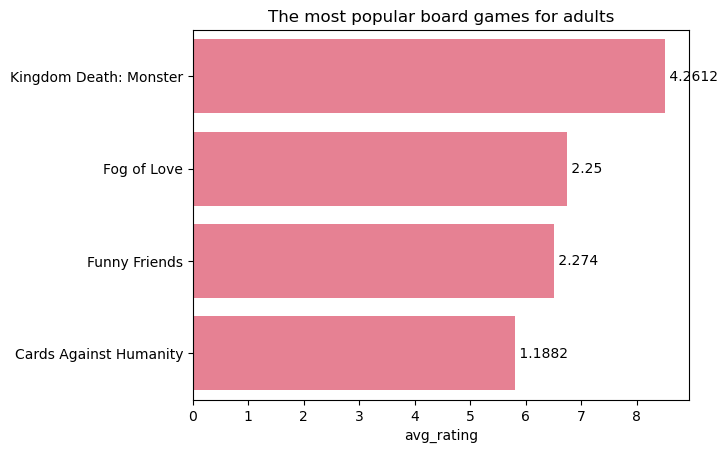

In [404]:
adult = df2000[(df2000['num_votes']>1000) & (df2000['min_age_rec']>16)] 
top20adult = adult.sort_values(by='avg_rating', ascending=False).iloc[:20]
barplot = sns.barplot(data=top20adult, y = 'name', x = 'avg_rating')
plt.title('The most popular board games for adults')
plt.ylabel(None)
# Adding year of release as labels
for index, value in enumerate(top20adult['avg_rating']):
    barplot.text(value, index, f" {top20adult.iloc[index]['complexity']}", color='black', va="center")

plt.show()

**Game Type Analysis**

How different types of games (e.g., strategy, party, family) perform in terms of ratings and votes?

In [406]:
df2000top['game_type'].describe()

count      729
unique      22
top       5497
freq       272
Name: game_type, dtype: object

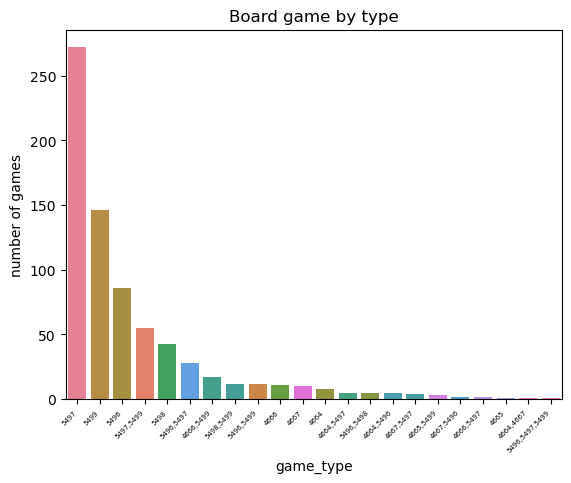

In [444]:
sns.countplot(data=df2000top, 
             x = 'game_type', 
             order=df2000top['game_type'].value_counts().index,
             hue= 'game_type')
plt.xticks(rotation=45, ha ='right', size = 5)
plt.ylabel('number of games')
plt.title('Board game by type')
plt.show()